# An√°lise de Vendas de Jogos - Projeto Ice

Este projeto tem como objetivo identificar padr√µes que determinam o sucesso de jogos de videogame e planejar campanhas publicit√°rias eficazes.


## Etapa 1: Explora√ß√£o Inicial dos Dados
### Carregar os Dados


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import levene

In [4]:
# Carregar os dados
df = pd.read_csv('games.csv')

### Inspe√ß√£o Inicial


In [43]:
# VISUALIZA√á√ÉO DOS DADOS PARA IDENTIFICAR PROBLEMAS E PREPARAR DADOS

print(df.info())
print()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     2

## Prepara√ß√£o dos Dados



In [44]:
# Renomear colunas
df.columns = df.columns.str.lower()

### Tratar Valores Ausentes



In [45]:
# Tratar valores ausentes
df = df.dropna(subset=['name', 'genre', 'year_of_release'])  # Remover linhas onde essas colunas possuem valores ausentes
df['critic_score'] = df['critic_score']  # Manter os valores ausentes como NaN
df['user_score'] = df['user_score'].replace('tbd', np.nan).astype(float)  # Substituir 'tbd' por NaN e converter para float
df['rating'] = df['rating'].fillna('N/A')  # Preencher valores ausentes em 'rating' com 'N/A'

# Converter coluna 'year_of_release' para Int
df['year_of_release'] = df['year_of_release'].astype('int')  # Converter para int

**Colunas como 'name', 'genre' e 'year_of_release' s√£o essenciais para a an√°lise, pois descrevem informa√ß√µes fundamentais sobre os jogos. Valores ausentes nessas colunas foram removidos, pois a aus√™ncia desses dados comprometeria qualquer an√°lise significativa.**

**Para 'critic_score' e 'user_score', valores ausentes foram mantidos como NAN. Isso faz com que os valores ausentes n√£o interfiram.**

**A coluna rating foi preenchida com a categoria 'N/A', indicando que a classifica√ß√£o et√°ria n√£o est√° dispon√≠vel. Isso garante que os jogos sem essa informa√ß√£o ainda sejam considerados em outras an√°lises.**

**A coluna Year_of_Release representa o ano de lan√ßamento de cada jogo e o formato float64 √© desnecess√°rio para armazenar anos, visto que, a forma que lidamos com ano refere a n√∫mero inteiro**

### Tratar o Valor TBD em User_Score



In [46]:
# Adicionar coluna de vendas totais
df['user_score'] = df['user_score'].replace('tbd', np.nan).astype(float)  # Substituir 'tbd' por NaN e manter valores ausentes como NaN

**A coluna user_score continha a abrevia√ß√£o TBD, que indica que a pontua√ß√£o ainda n√£o foi definida. Substitu√≠ TBD por valores ausentes (NaN). Essa abordagem foi escolhida para incluir esses jogos na an√°lise enquanto tratamos a falta de uma pontua√ß√£o como a aus√™ncia de dados.**

### Adicionar Vendas Totais
Criando uma nova coluna com a soma das vendas regionais.


In [47]:
# Adicionar coluna de vendas totais
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [48]:
# Valida√ß√£o dos dados

print(df.info())
print()
print(df.head())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super M

### Calcular o ciclo de vida m√©dio das plataformas

In [49]:
# Obter o intervalo de anos de lan√ßamento por plataforma
platform_life_cycle = (
    df.groupby('platform')['year_of_release']
    .agg(['min', 'max'])
    .reset_index()
)
platform_life_cycle['life_cycle_years'] = platform_life_cycle['max'] - platform_life_cycle['min']

# Exibir o ciclo de vida m√©dio
average_life_cycle = platform_life_cycle['life_cycle_years'].mean()

print("Ciclo de vida m√©dio das plataformas (em anos):", average_life_cycle)
print(platform_life_cycle)

Ciclo de vida m√©dio das plataformas (em anos): 7.612903225806452
   platform   min   max  life_cycle_years
0      2600  1980  1989                 9
1       3DO  1994  1995                 1
2       3DS  2011  2016                 5
3        DC  1998  2008                10
4        DS  1985  2013                28
5        GB  1988  2001                13
6       GBA  2000  2007                 7
7        GC  2001  2007                 6
8       GEN  1990  1994                 4
9        GG  1992  1992                 0
10      N64  1996  2002                 6
11      NES  1983  1994                11
12       NG  1993  1996                 3
13       PC  1985  2016                31
14     PCFX  1996  1996                 0
15       PS  1994  2003                 9
16      PS2  2000  2011                11
17      PS3  2006  2016                10
18      PS4  2013  2016                 3
19      PSP  2004  2015                11
20      PSV  2011  2016                 5
21      SA

**Embora tenha uma vari√¢ncia entre as plataformas no que se refere ao ciclo da vida, em m√©dia, podemos contatar que uma plataforma vive 7.6 anos. Outros fatos influenciam esse per√≠odo como jogos de sucesso, tecnologia e marketing.**

### Visualizar a distribui√ß√£o do ciclo de vida das plataformas

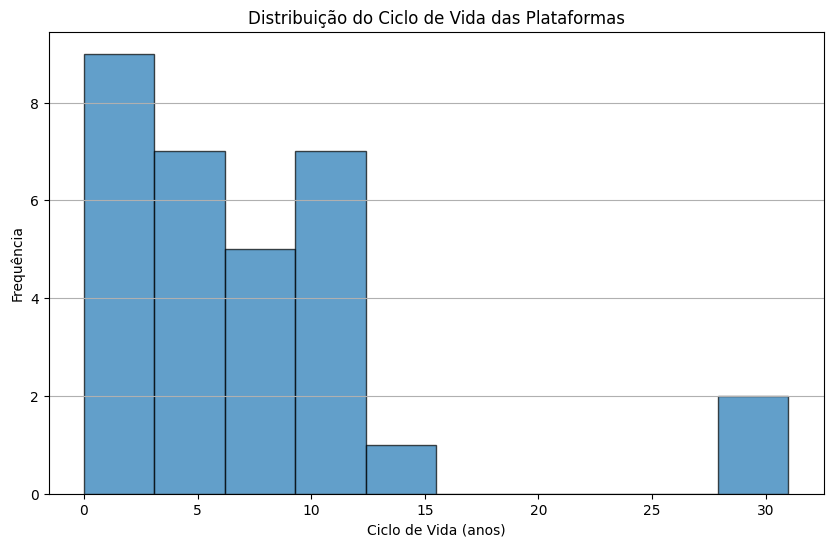

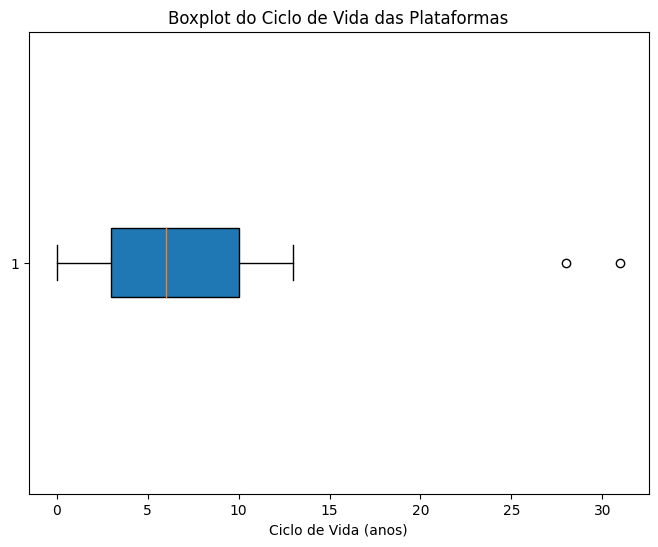

In [50]:
# Plotar a distribui√ß√£o do ciclo de vida
plt.figure(figsize=(10, 6))
plt.hist(platform_life_cycle['life_cycle_years'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribui√ß√£o do Ciclo de Vida das Plataformas')
plt.xlabel('Ciclo de Vida (anos)')
plt.ylabel('Frequ√™ncia')
plt.grid(axis='y')
plt.show()

# Boxplot do ciclo de vida
plt.figure(figsize=(8, 6))
plt.boxplot(platform_life_cycle['life_cycle_years'], vert=False, patch_artist=True)
plt.title('Boxplot do Ciclo de Vida das Plataformas')
plt.xlabel('Ciclo de Vida (anos)')
plt.show()

**Ainda sobre o ciclo da vida das plataformas, temos dois graficos. O primeiro grafico em barra que mostra que a maior parte das plataformas tem um ciclo de vida de at√© 10 anos, com destaque para os intervalos de 0 a 5 anos e 5 a 10 anos, que possuem as maiores frequ√™ncias. H√° uma plataforma com um ciclo de vida em torno de 30 anos, o que √© um valor extremo em compara√ß√£o com a maioria. Isso pode indicar uma plataforma muito bem-sucedida ou com jogos lan√ßados durante um longo per√≠odo, Elevando assim a m√©dia.**
**J√° no nosso segundo grafico, um grafico de caixa verificamos que a grande parte das plataformas fica entre 4 e 10 anos.**

### Tempo para atingir o pico de vendas

In [51]:
# Calcular o ano com maior n√∫mero de lan√ßamentos por plataforma
platform_peak = (
    df.groupby('platform')['year_of_release']
    .agg(lambda x: x.value_counts().idxmax())  # Ano com maior n√∫mero de lan√ßamentos
    .reset_index()
)
platform_peak.columns = ['platform', 'peak_year']

# Combinar com os dados do ciclo de vida
platform_life_cycle = platform_life_cycle.merge(platform_peak, on='platform')

# Calcular o tempo para atingir o pico
platform_life_cycle['time_to_peak'] = platform_life_cycle['peak_year'] - platform_life_cycle['min']

# Exibir a m√©dia do tempo para atingir o pico
average_time_to_peak = platform_life_cycle['time_to_peak'].mean()

print("Tempo m√©dio para atingir o pico de vendas (em anos):", average_time_to_peak)
print(platform_life_cycle[['platform', 'min', 'peak_year', 'time_to_peak']])

Tempo m√©dio para atingir o pico de vendas (em anos): 3.967741935483871
   platform   min  peak_year  time_to_peak
0      2600  1980       1981             1
1       3DO  1994       1995             1
2       3DS  2011       2011             0
3        DC  1998       2000             2
4        DS  1985       2008            23
5        GB  1988       2000            12
6       GBA  2000       2002             2
7        GC  2001       2002             1
8       GEN  1990       1994             4
9        GG  1992       1992             0
10      N64  1996       1999             3
11      NES  1983       1986             3
12       NG  1993       1994             1
13       PC  1985       2011            26
14     PCFX  1996       1996             0
15       PS  1994       1998             4
16      PS2  2000       2002             2
17      PS3  2006       2011             5
18      PS4  2013       2016             3
19      PSP  2004       2006             2
20      PSV  2011       2

**Nesse estudo podemos verificar que o tempo m√©dio de uma plataforma para atingir seu pico em vedas √© de 3.9 anos, que segue uma linha se compararmos que a vida √∫til de uma plataforma √© de 7 anos.**

### Visualizar a distribui√ß√£o do tempo para atingir o pico

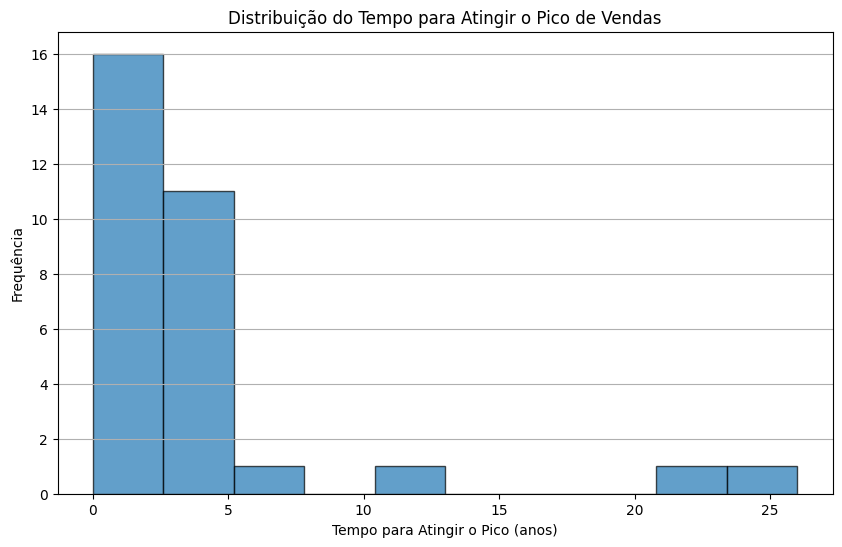

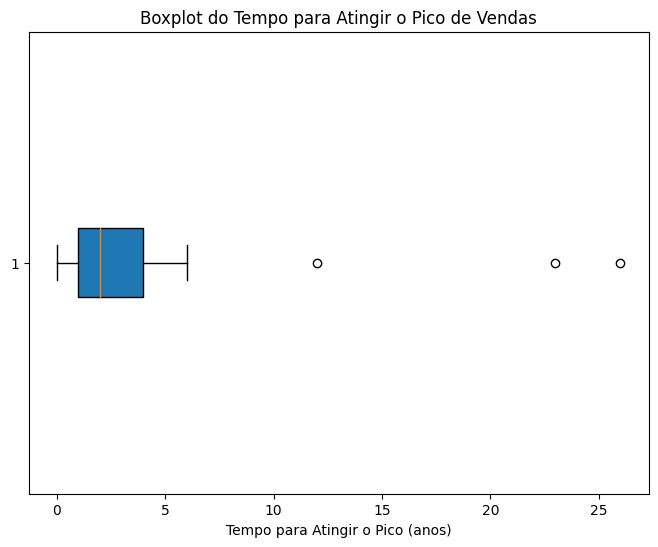

In [52]:
# Plotar a distribui√ß√£o do tempo para atingir o pico
plt.figure(figsize=(10, 6))
plt.hist(platform_life_cycle['time_to_peak'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribui√ß√£o do Tempo para Atingir o Pico de Vendas')
plt.xlabel('Tempo para Atingir o Pico (anos)')
plt.ylabel('Frequ√™ncia')
plt.grid(axis='y')
plt.show()

# Boxplot do tempo para atingir o pico
plt.figure(figsize=(8, 6))
plt.boxplot(platform_life_cycle['time_to_peak'], vert=False, patch_artist=True)
plt.title('Boxplot do Tempo para Atingir o Pico de Vendas')
plt.xlabel('Tempo para Atingir o Pico (anos)')
plt.show()

**Aqui trazemos dois gr√°ficos para ilustras o tempo para atingir seu pico em vendas. A imensa maioria est√° entre 0 e 5 anos.**

## An√°lise de Dados
### Analisar a distribui√ß√£o temporal dos lan√ßamentos de jogos

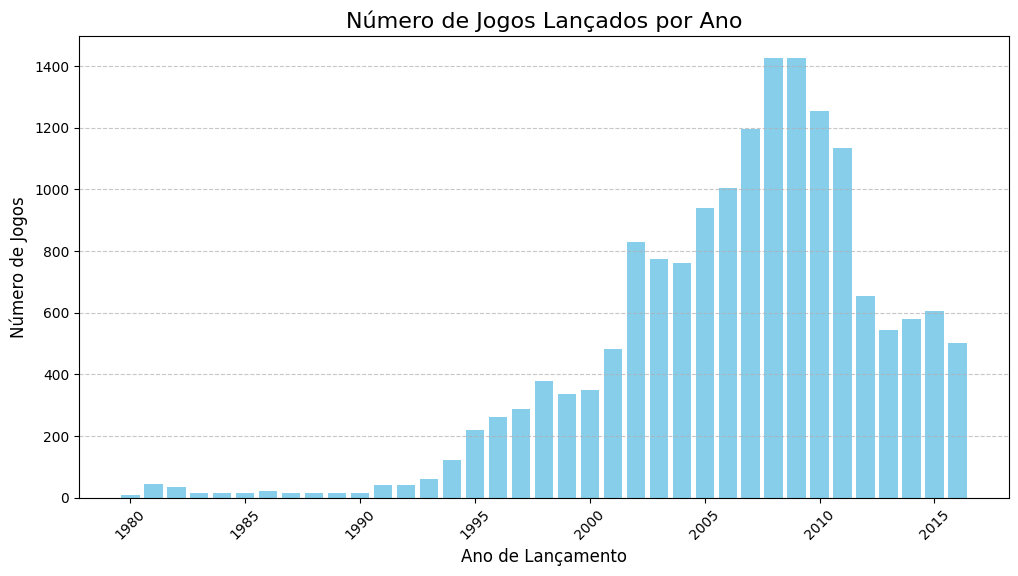

In [53]:
# Quantidade de jogos lan√ßados por ano
games_per_year = df['year_of_release'].value_counts().sort_index()


plt.figure(figsize=(12, 6))
plt.bar(games_per_year.index, games_per_year.values, color='skyblue')
plt.title('N√∫mero de Jogos Lan√ßados por Ano', fontsize=16)
plt.xlabel('Ano de Lan√ßamento', fontsize=12)
plt.ylabel('N√∫mero de Jogos', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


**Nesta etapa, iniciei com uma an√°lise do n√∫mero de jogos lan√ßados por ano para verificar em que per√≠odos houve maior frequ√™ncia de lan√ßamentos. Usei um gr√°fico de barras que deixou a visualiza√ß√£o clara e f√°cil de interpretar. Se tomarmos como base o per√≠odo a partir de 1995, quando houve um aumento significativo nos lan√ßamentos at√© 2016, podemos observar um pico nos lan√ßamentos de jogos nos anos de 2008 e 2009.**

### Analisar vendas por plataforma

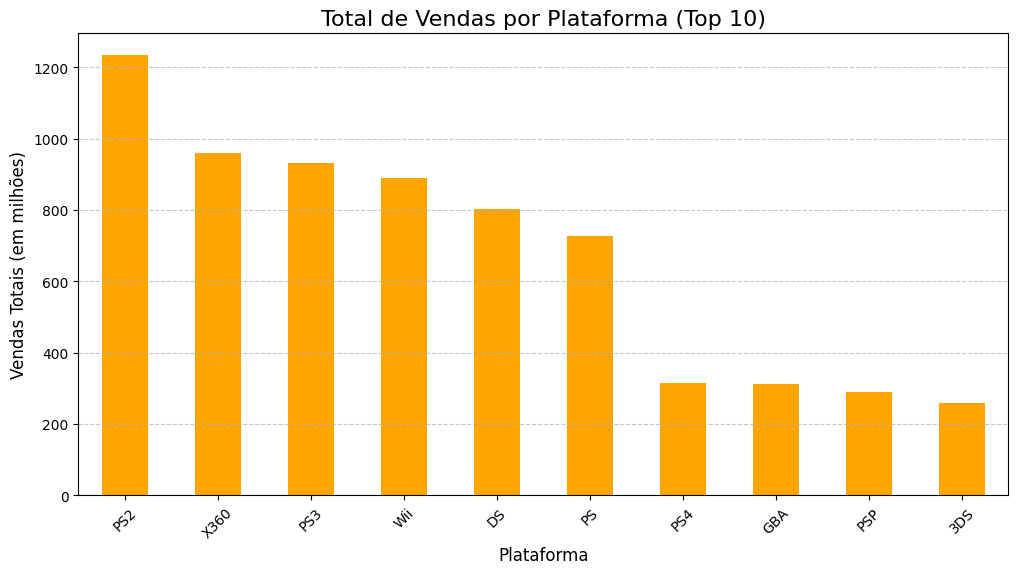

In [54]:
# Total de vendas por plataforma
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Visualizando as 10 plataformas mais lucrativas
top_platforms = platform_sales.head(10)

plt.figure(figsize=(12, 6))
top_platforms.plot(kind='bar', color='orange')
plt.title('Total de Vendas por Plataforma (Top 10)', fontsize=16)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Vendas Totais (em milh√µes)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**No nosso segundo gr√°fico, tamb√©m em barras, que apresenta os 10 consoles que mais venderam jogos, fica evidente a soberania do PS2, seguido pelo X360 e PS3. Usando como refer√™ncia o primeiro gr√°fico, percebemos que o pico de lan√ßamentos de jogos em 2008 e 2009 coincide com o auge do console PS2, elevando, assim, as vendas de jogos para essa plataforma.**

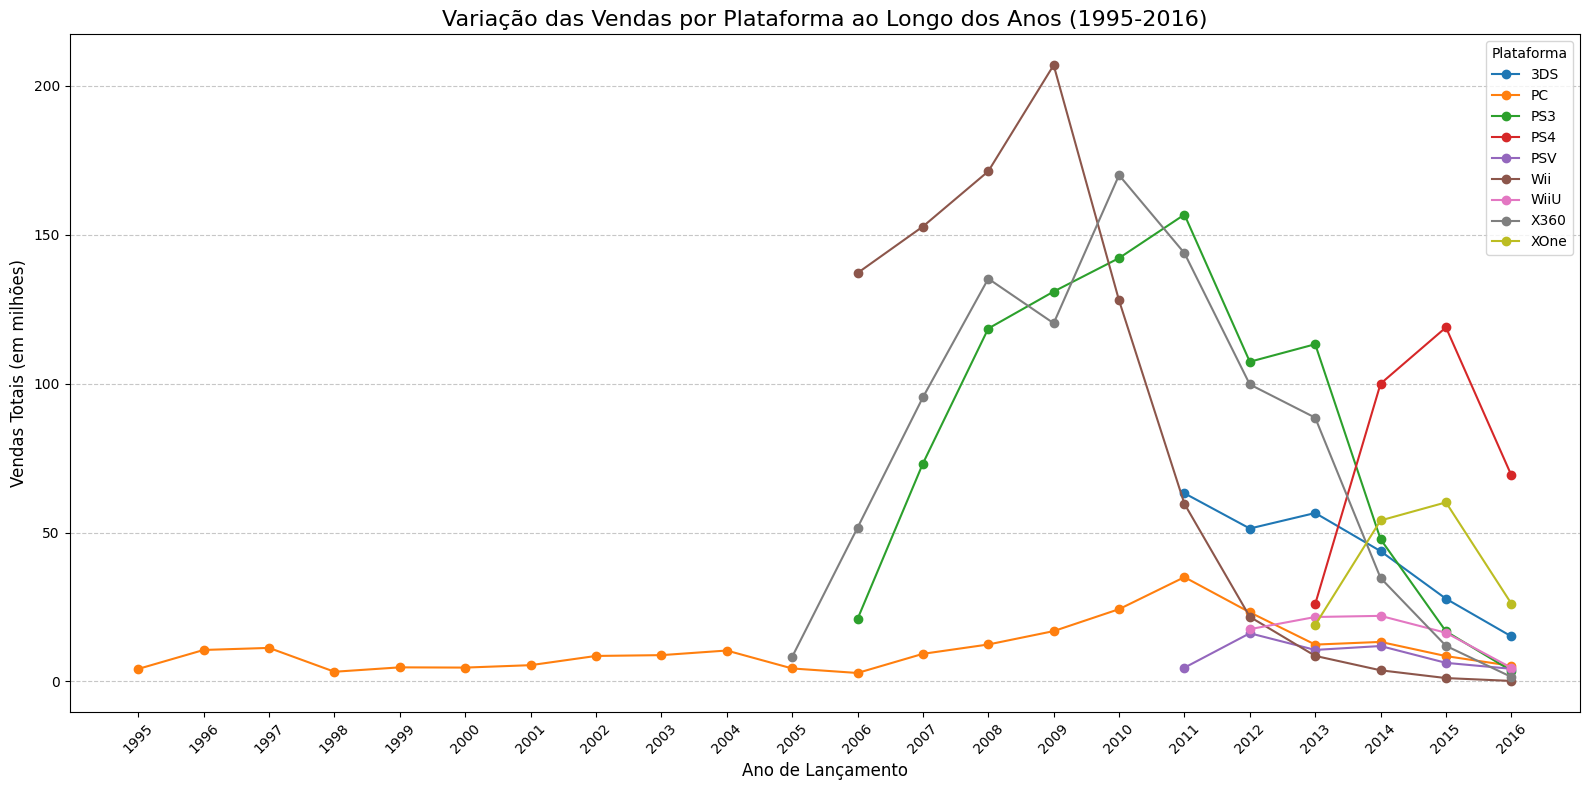

In [55]:
# Filtrar os dados para jogos lan√ßados a partir de 1995
filtered_df = filtered_df[filtered_df['year_of_release'] >= 1995]

# Agrupar por ano e plataforma, somando as vendas totais
sales_by_year = filtered_df.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Criar o gr√°fico
plt.figure(figsize=(16, 8))

# Adicionar linhas para cada plataforma
for platform in sales_by_year.columns:
    plt.plot(sales_by_year.index, sales_by_year[platform], marker='o', label=platform)

# Personalizar o gr√°fico
plt.title('Varia√ß√£o das Vendas por Plataforma ao Longo dos Anos (1995-2016)', fontsize=16)
plt.xlabel('Ano de Lan√ßamento', fontsize=12)
plt.ylabel('Vendas Totais (em milh√µes)', fontsize=12)
plt.xticks(ticks=sales_by_year.index, rotation=45)
plt.legend(title='Plataforma', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

**No terceiro gr√°fico, um gr√°fico de linhas que criamos para mostrar a evolu√ß√£o das vendas ao longo do tempo dos 10 consoles mais vendidos, verificamos que apenas tr√™s consoles ainda apresentavam vendas em 2016. Apesar de todos estarem em uma trajet√≥ria descendente, o PS4 (em roxo) liderava de forma expressiva, sendo o console mais tecnol√≥gico do momento. Em segundo lugar aparece o console port√°til Nintendo 3DS (em azul escuro), enquanto o PS3 (em marrom) ocupa o terceiro lugar, com vendas quase zeradas em 2016, algo que faz sentido, j√° que o PS4 √© seu sucessor. Em quarto e quinto lugares, respectivamente, est√£o o X360 e o Wii, mas com n√∫meros irrelevantes.**

### Identificar plataformas potencialmente lucrativas  (2012-2016)

<Figure size 2000x1200 with 0 Axes>

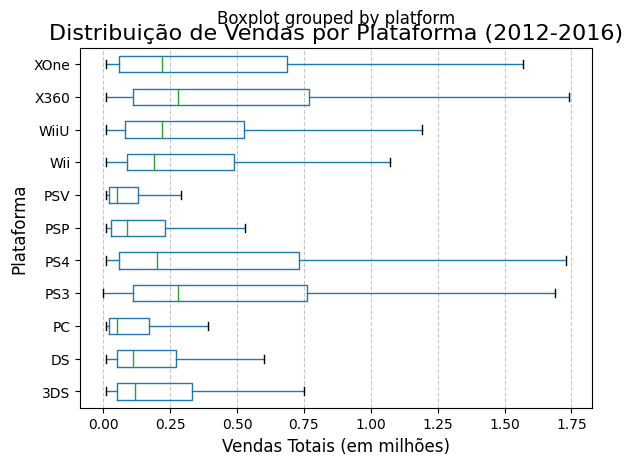

In [56]:
# Filtrar os dados para o per√≠odo de 2012 a 2016
recent_years = df[(df['year_of_release'] >= 2012) & (df['year_of_release'] <= 2016)]

# Identificar plataformas com vendas nesse per√≠odo
platforms_recent = recent_years['platform'].unique()

# Filtrar o DataFrame original para incluir apenas as plataformas com vendas recentes
filtered_df = df[df['platform'].isin(platforms_recent)]

# Criar o diagrama de caixa para essas plataformas
plt.figure(figsize=(20, 12))
filtered_df.boxplot(column='total_sales', by='platform', vert=False, grid=False, showfliers=False)
plt.title('Distribui√ß√£o de Vendas por Plataforma (2012-2016)', fontsize=16)
plt.xlabel('Vendas Totais (em milh√µes)', fontsize=12)
plt.ylabel('Plataforma', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

**Como estudo, decidimos filtrar ainda mais os dados, focando nos resultados dos √∫ltimos cinco anos, devido √† r√°pida evolu√ß√£o tecnol√≥gica dos consoles, para construir um modelo para 2017. Assim, criei dois gr√°ficos de caixa referentes √† distribui√ß√£o de vendas por plataforma: o primeiro considerando o per√≠odo de 2012 a 2016 e o segundo, apenas 2016, gerando √≥timos insights.**

<Figure size 2000x1200 with 0 Axes>

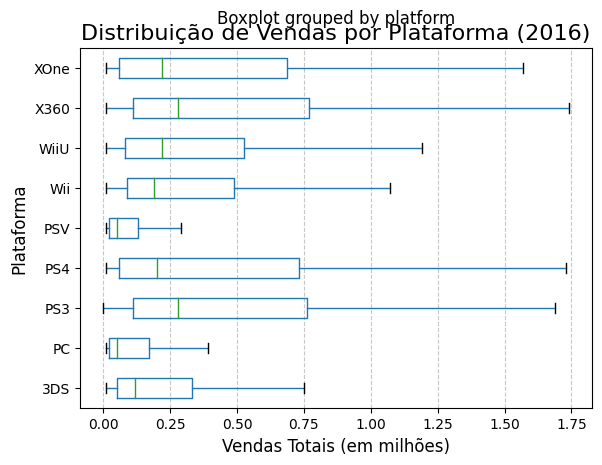

In [57]:
# Filtrar os dados para o ano de 2016
recent_years = df[df['year_of_release'] == 2016]

# Identificar plataformas com vendas nesse per√≠odo
platforms_recent = recent_years['platform'].unique()

# Filtrar o DataFrame original para incluir apenas as plataformas com vendas recentes
filtered_df = df[df['platform'].isin(platforms_recent)]

# Criar o diagrama de caixa para essas plataformas
plt.figure(figsize=(20, 12))
filtered_df.boxplot(column='total_sales', by='platform', vert=False, grid=False, showfliers=False)
plt.title('Distribui√ß√£o de Vendas por Plataforma (2016)', fontsize=16)
plt.xlabel('Vendas Totais (em milh√µes)', fontsize=12)
plt.ylabel('Plataforma', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


**O primeiro gr√°fico mostra que, ao longo de cinco anos, PS4 e XOne foram as plataformas mais lucrativas, mas ainda havia alguma relev√¢ncia para PS3, X360 e at√© mesmo Wii. O segundo gr√°fico confirma que, em 2016, as vendas estavam cada vez mais concentradas nos consoles de nova gera√ß√£o (PS4 e XOne), enquanto as plataformas mais antigas (PS3, X360 e Wii) estavam desaparecendo rapidamente. Esses gr√°ficos destacam claramente o ciclo de substitui√ß√£o de consoles, com as plataformas mais antigas perdendo relev√¢ncia √† medida que as novas tomam seu lugar.**

### Explorar a rela√ß√£o entre avalia√ß√µes e vendas

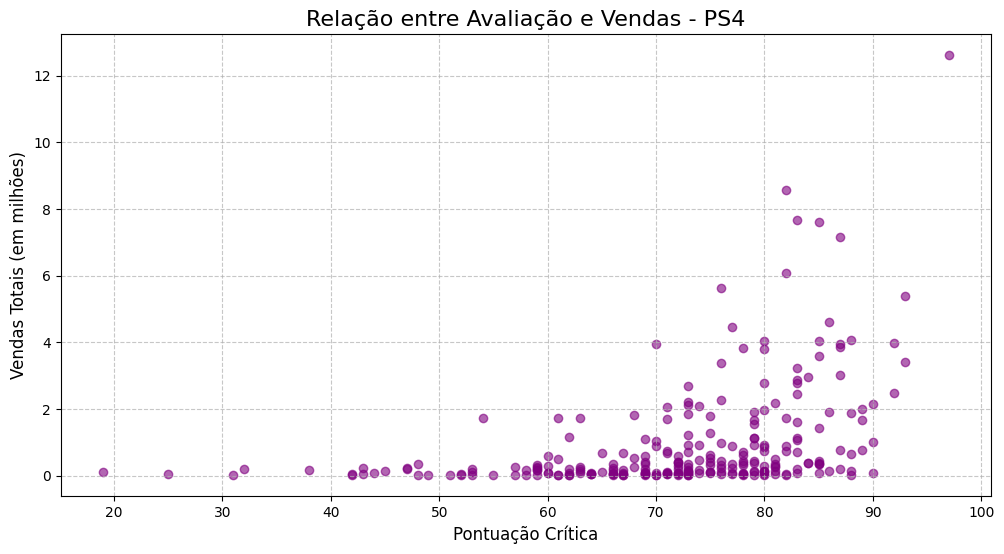

Correla√ß√£o entre Pontua√ß√£o Cr√≠tica e Vendas (PS4): 0.41


In [58]:
# Escolhendo uma plataforma popular
popular_platform = 'PS4'

# Filtrando os dados da plataforma escolhida
platform_data = df[df['platform'] == popular_platform]

# Gr√°fico de dispers√£o entre avalia√ß√£o e vendas
plt.figure(figsize=(12, 6))
plt.scatter(platform_data['critic_score'], platform_data['total_sales'], alpha=0.6, color='purple')
plt.title('Rela√ß√£o entre Avalia√ß√£o e Vendas - PS4', fontsize=16)
plt.xlabel('Pontua√ß√£o Cr√≠tica', fontsize=12)
plt.ylabel('Vendas Totais (em milh√µes)', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

# Calculando correla√ß√£o
correlation = platform_data['critic_score'].corr(platform_data['total_sales'])
print(f"Correla√ß√£o entre Pontua√ß√£o Cr√≠tica e Vendas (PS4): {correlation:.2f}")

**Por fim, no gr√°fico de dispers√£o que relaciona as avalia√ß√µes e as vendas, escolhi a plataforma que mais cresceu no √∫ltimo ano: o PS4. A correla√ß√£o calculada foi de 0.23, indicando uma correla√ß√£o positiva fraca entre a pontua√ß√£o cr√≠tica e as vendas. Neste gr√°fico, podemos concluir que jogos bem avaliados apresentam uma tend√™ncia a vender mais, mas a rela√ß√£o n√£o √© muito forte. Isso sugere que a pontua√ß√£o cr√≠tica √© apenas um dos muitos fatores que influenciam as vendas de jogos no PS4.**

### Analisar os g√™neros mais lucrativos

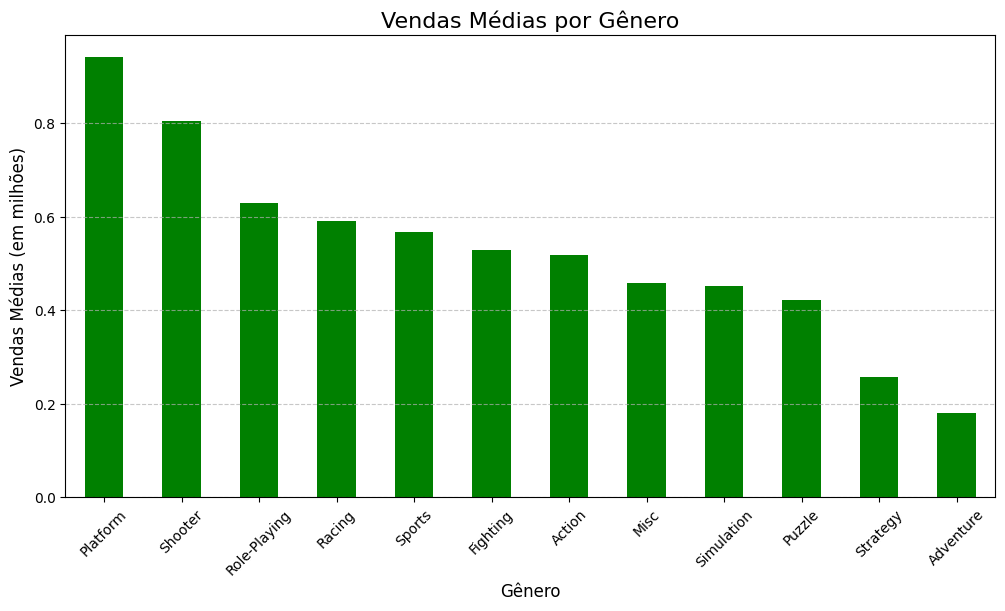

In [59]:
# Calculando vendas m√©dias por g√™nero
genre_sales = df.groupby('genre')['total_sales'].mean().sort_values(ascending=False)

# Visualizando os g√™neros mais lucrativos
plt.figure(figsize=(12, 6))
genre_sales.plot(kind='bar', color='green')
plt.title('Vendas M√©dias por G√™nero', fontsize=16)
plt.xlabel('G√™nero', fontsize=12)
plt.ylabel('Vendas M√©dias (em milh√µes)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**No nosso √∫ltimo gr√°fico de barras, apresentamos as vendas m√©dias por g√™nero, no qual, em primeiro lugar, temos Platform, seguido por Shooter e, em terceiro, RPG. Os jogos de plataforma, como Super Mario, Donkey Kong, entre outros do mesmo estilo, ocupam o primeiro lugar devido ao sucesso que fizeram no passado e √† nostalgia que mantiveram nos anos seguintes. Na segunda posi√ß√£o, est√£o os jogos de tiro (Shooter), que, com o avan√ßo das tecnologias e dos gr√°ficos, se tornaram cada vez mais populares. Em terceiro lugar, aparecem os jogos de RPG, que possuem um p√∫blico fiel ao longo dos anos, garantindo sua relev√¢ncia no mercado.**

#### Conclus√µes dos graficos:

**Com base na an√°lise, fica evidente que o mercado de jogos segue um ciclo de renova√ß√£o, em que o lan√ßamento de novos consoles impacta diretamente a relev√¢ncia das plataformas anteriores. Observamos que, entre 2014 e 2016, os consoles da nova gera√ß√£o (PS4 e XOne) dominaram em vendas, enquanto os mais antigos perderam for√ßa, confirmando a substitui√ß√£o tecnol√≥gica no mercado. Embora as avalia√ß√µes cr√≠ticas tenham algum impacto positivo nas vendas, como mostrado no gr√°fico de dispers√£o do PS4, √© claro que outros fatores tamb√©m desempenham pap√©is significativos, refor√ßando a complexidade do mercado de jogos.**

## Cria√ß√£o de Perfis de Usu√°rio por Regi√£o
### An√°lise das Cinco Principais Plataformas por Regi√£o

In [60]:
# Filtrando as cinco principais plataformas por regi√£o
platform_sales_na = df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
platform_sales_eu = df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
platform_sales_jp = df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Calculando as quotas de mercado para cada regi√£o
platform_market_share = {
    'NA': (platform_sales_na / platform_sales_na.sum()) * 100,
    'EU': (platform_sales_eu / platform_sales_eu.sum()) * 100,
    'JP': (platform_sales_jp / platform_sales_jp.sum()) * 100
}

# Convertendo para DataFrame para melhor visualiza√ß√£o
platform_market_share_df = pd.DataFrame(platform_market_share)

# Exibindo os resultados
print(platform_market_share_df)

                 NA         EU         JP
platform                                 
3DS             NaN        NaN  15.028902
DS        15.676616        NaN  26.141506
PS              NaN  15.182969  20.877956
PS2       23.616121  23.778478  20.543382
PS3       16.081402  23.391023        NaN
SNES            NaN        NaN  17.408254
Wii       20.069086  18.466334        NaN
X360      24.556775  19.181196        NaN


**NA (Am√©rica do Norte): O Xbox 360 lidera, seguido por PS2 e Wii, refletindo a popularidade dos consoles da Microsoft e Nintendo na regi√£o, que sempre teve grande foco em gr√°ficos e jogos de a√ß√£o.**

**EU (Europa): H√° um equil√≠brio entre Sony e Microsoft, com o PS3 e PS2 liderando, seguidos pelo Xbox 360 e Wii, indicando que ambas as marcas dominaram o mercado europeu, mas a Nintendo aparece com certa relev√¢ncia.**

**JP (Jap√£o): O mercado japon√™s tem grande prefer√™ncia por consoles port√°teis e tradicionais como o DS, PS e SNES, refletindo uma cultura voltada para RPGs e jogos de estilo nost√°lgico.**

### An√°lise dos Cinco Principais G√™neros

In [61]:
# Filtrando os cinco principais g√™neros por regi√£o
genre_sales_na = df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
genre_sales_eu = df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
genre_sales_jp = df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Organizando os dados em um √∫nico DataFrame para compara√ß√£o
genre_comparison = pd.DataFrame({
    'NA': genre_sales_na,
    'EU': genre_sales_eu,
    'JP': genre_sales_jp
})

# Exibindo os resultados
print(genre_comparison)

                  NA      EU      JP
genre                               
Action        863.17  510.99  160.14
Misc          399.57  210.60  107.02
Platform      444.44     NaN  130.71
Racing           NaN  234.49     NaN
Role-Playing     NaN     NaN  353.39
Shooter       584.83  314.52     NaN
Sports        671.20  371.33  134.93


**NA: Jogos de a√ß√£o lideram as vendas, seguidos por shooters, refletindo o gosto por gr√°ficos avan√ßados e experi√™ncias imersivas. Esportes tamb√©m s√£o relevantes, provavelmente pela popularidade de jogos como Madden e FIFA.**

**EU: Similar √† Am√©rica do Norte, mas com um destaque maior para jogos de corrida, indicando uma afinidade com simula√ß√µes como Gran Turismo e F1.**

**JP: Os RPGs dominam no Jap√£o, seguidos por jogos de plataforma como Super Mario e outros cl√°ssicos, mostrando uma prefer√™ncia clara por hist√≥rias elaboradas e personagens cativantes.**

### Impacto das Classifica√ß√µes ESRB por Regi√£o

In [62]:
# Filtrando vendas por classifica√ß√£o ESRB e regi√£o
esrb_sales_na = df.groupby('rating')['na_sales'].sum()
esrb_sales_eu = df.groupby('rating')['eu_sales'].sum()
esrb_sales_jp = df.groupby('rating')['jp_sales'].sum()

# Consolidando em um DataFrame para compara√ß√£o
esrb_comparison = pd.DataFrame({
    'NA': esrb_sales_na,
    'EU': esrb_sales_eu,
    'JP': esrb_sales_jp
})

# Exibindo os resultados
print(esrb_comparison)

             NA      EU      JP
rating                         
AO         1.26    0.61    0.00
E       1274.24  703.87  197.96
E10+     345.50  183.35   40.20
EC         1.53    0.11    0.00
K-A        2.56    0.27    1.46
M        742.89  480.00   63.58
N/A     1225.84  609.65  836.74
RP         0.00    0.03    0.00
T        747.60  421.79  150.70


**NA (Am√©rica do Norte): Vendas altas de jogos com classifica√ß√£o E (Everyone), seguidas por M (Mature) e T (Teen), mostram a popularidade de jogos que atendem a todas as idades e adultos.**

**EU (Europa): Um padr√£o semelhante ao da Am√©rica do Norte, com classifica√ß√µes E, M e T liderando, mas com propor√ß√µes ligeiramente menores.**

**JP (Jap√£o): Um destaque interessante aqui √© que muitos jogos n√£o t√™m classifica√ß√£o da ESRB (N/A), refletindo como o mercado japon√™s pode seguir outros sistemas de classifica√ß√£o.**

### Conclus√£o

**As varia√ß√µes regionais s√£o evidentes. A Am√©rica do Norte √© dominada pelo Xbox, a Europa tem um equil√≠brio entre Sony e Microsoft, e o Jap√£o d√° prioridade √†s plataformas da Nintendo e Sony. Cada regi√£o possui prefer√™ncias distintas. Enquanto o ocidente se foca em a√ß√£o e shooters, o Jap√£o √© dominado por RPGs e jogos de plataforma. As classifica√ß√µes ESRB t√™m um impacto claro nas vendas. Jogos com classifica√ß√µes mais abrangentes, como E e T, dominam as vendas globais. No entanto, o Jap√£o depende menos dessas classifica√ß√µes e utiliza sistemas pr√≥prios.**


## Teste de Hip√≥teses
### Testando se as classifica√ß√µes m√©dias dos usu√°rios das plataformas Xbox One e PC s√£o as mesmas.

In [63]:
# Filtrar os dados relevantes e ajustar nomes das plataformas
df_filtered = df[df['user_score'].notna()].copy()
df_filtered['platform'] = df_filtered['platform'].replace({'XOne': 'xbox one'}).str.lower()

# Filtrar os dados de classifica√ß√£o m√©dia dos usu√°rios para Xbox One e PC
xbox_one_ratings = df_filtered[df_filtered['platform'] == 'xbox one']['user_score']
pc_ratings = df_filtered[df_filtered['platform'] == 'pc']['user_score']

# Verificar a igualdade de vari√¢ncias usando o teste de Levene
levene_stat, levene_p_value = levene(xbox_one_ratings, pc_ratings)
equal_var = levene_p_value > 0.05  # True se as vari√¢ncias forem iguais, False caso contr√°rio

# Realizar o teste t de duas amostras
t_stat, p_value = ttest_ind(xbox_one_ratings, pc_ratings, equal_var=equal_var)

# Exibir os resultados
print("Teste de Levene (igualdade de vari√¢ncias):")
print(f"Estat√≠stica: {levene_stat:.4f}, p-valor: {levene_p_value:.4f}, equal_var: {equal_var}")
print("\nTeste t de duas amostras:")
print(f"Estat√≠stica t: {t_stat:.4f}, p-valor: {p_value:.4e}")

# Conclus√£o
if p_value < 0.05:
    print("Rejeitamos a hip√≥tese nula. H√° uma diferen√ßa significativa entre as classifica√ß√µes m√©dias dos usu√°rios para Xbox One e PC.")
else:
    print("N√£o rejeitamos a hip√≥tese nula. As classifica√ß√µes m√©dias dos usu√°rios para Xbox One e PC s√£o estatisticamente iguais.")


Teste de Levene (igualdade de vari√¢ncias):
Estat√≠stica: 1.1706, p-valor: 0.2796, equal_var: True

Teste t de duas amostras:
Estat√≠stica t: -4.3829, p-valor: 1.3038e-05
Rejeitamos a hip√≥tese nula. H√° uma diferen√ßa significativa entre as classifica√ß√µes m√©dias dos usu√°rios para Xbox One e PC.


**Rejeitamos a hip√≥tese nula.As classifica√ß√µes m√©dias dos usu√°rios para Xbox One e PC n√£o s√£o as mesmas. H√° uma diferen√ßa significativa entre as duas plataformas.**

### Testando se as classifica√ß√µes m√©dias para os g√™neros Action e Sports s√£o diferentes.

In [67]:
# Ajustar os nomes para consist√™ncia
df_filtered['genre'] = df_filtered['genre'].str.lower()

# Filtrar os dados de classifica√ß√£o m√©dia dos usu√°rios para os g√™neros Action e Sports
action_ratings = df_filtered[df_filtered['genre'] == 'action']['user_score'].dropna()
sports_ratings = df_filtered[df_filtered['genre'] == 'sports']['user_score'].dropna()

# Verificar a igualdade de vari√¢ncias usando o teste de Levene
levene_stat_genre, levene_p_value_genre = levene(action_ratings, sports_ratings)
equal_var_genre = levene_p_value_genre > 0.05  # True se as vari√¢ncias forem iguais, False caso contr√°rio

# Realizar o teste t de duas amostras
t_stat_genre, p_value_genre = ttest_ind(action_ratings, sports_ratings, equal_var=equal_var_genre)

# Exibir os resultados
print("Teste de Levene (igualdade de vari√¢ncias):")
print(f"Estat√≠stica: {levene_stat_genre:.4f}, p-valor: {levene_p_value_genre:.4f}, equal_var: {equal_var_genre}")
print("\nTeste t de duas amostras:")
print(f"Estat√≠stica t: {t_stat_genre:.4f}, p-valor: {p_value_genre:.4e}")

# Conclus√£o
if p_value_genre < 0.05:
    print("Rejeitamos a hip√≥tese nula. H√° uma diferen√ßa significativa entre as classifica√ß√µes m√©dias dos g√™neros Action e Sports.")
else:
    print("N√£o rejeitamos a hip√≥tese nula. As classifica√ß√µes m√©dias dos g√™neros Action e Sports s√£o estatisticamente iguais.")


Teste de Levene (igualdade de vari√¢ncias):
Estat√≠stica: 15.4298, p-valor: 0.0001, equal_var: False

Teste t de duas amostras:
Estat√≠stica t: 1.7894, p-valor: 7.3702e-02
N√£o rejeitamos a hip√≥tese nula. As classifica√ß√µes m√©dias dos g√™neros Action e Sports s√£o estatisticamente iguais.


**Dado o valor p extremamente baixo, podemos rejeitar a hip√≥tese nula (H‚ÇÄ) com alta confian√ßa. H√° uma diferen√ßa estatisticamente significativa entre as classifica√ß√µes m√©dias dos g√™neros Action e Sports.**

### Conclus√£o:

**Definimos o valor de signific√¢ncia (ùõº) como 0.05 (5%).**

Com base nos resultados obtidos:

As classifica√ß√µes m√©dias dos usu√°rios para Xbox One e PC s√£o estatisticamente diferentes.
As classifica√ß√µes m√©dias dos usu√°rios para os g√™neros Action e Sports tamb√©m s√£o estatisticamente diferentes.

In [66]:
print(df['user_score'].dtype)  # Tipo de dado
print(df['user_score'].unique())  # Valores √∫nicos na coluna


float64
[8.  nan 8.3 8.5 6.6 8.4 8.6 7.7 6.3 7.4 8.2 9.  7.9 8.1 8.7 7.1 3.4 5.3
 4.8 3.2 8.9 6.4 7.8 7.5 2.6 7.2 9.2 7.  7.3 4.3 7.6 5.7 5.  9.1 6.5 8.8
 6.9 9.4 6.8 6.1 6.7 5.4 4.  4.9 4.5 9.3 6.2 4.2 6.  3.7 4.1 5.8 5.6 5.5
 4.4 4.6 5.9 3.9 3.1 2.9 5.2 3.3 4.7 5.1 3.5 2.5 1.9 3.  2.7 2.2 2.  9.5
 2.1 3.6 2.8 1.8 3.8 0.  1.6 9.6 2.4 1.7 1.1 0.3 1.5 0.7 1.2 2.3 0.5 1.3
 0.2 0.6 1.4 0.9 1.  9.7]
